In [2]:
#loading data
import sqlite3
engine = sqlite3.connect('HW1_DB')
import pandas as pd

airlines_df = pd.read_sql('select * from airlines', engine)
print(airlines_df.head())
airports_df = pd.read_sql('select * from airports',engine)
routes_df = pd.read_sql('select * from routes', engine)
print(routes_df.describe())

   airline_id                                  airline_name alias iata  \
0           1                                Private flight          -   
1           2                                   135 Airways              
2           3                                 1Time Airline         1T   
3           4  2 Sqn No 1 Elementary Flying Training School              
4           5                               213 Flight Unit              

  airline_icao callsign  airline_county airline_Y  
0                                               Y  
1          GNL  GENERAL   United States         N  
2          RNX  NEXTIME    South Africa         Y  
3          WYT           United Kingdom         N  
4          TFU                   Russia         N  
       r_airline_id  source_airport_id  destin_airport_id         stops
count  66548.000000       66548.000000       66548.000000  66548.000000
mean    3367.569754        2660.201929        2662.088192      0.000165
std     3182.024330        

In [3]:
## Step 6.1

In [4]:
#6.1 Pulling Data from the Web
import requests
import io
import pandas as pd
aug_response = requests.get('http://big.dataanalytics.education/data/Flights-Aug-2016.csv',
                            auth=('user', 'pass'))
aug_csv = io.StringIO(aug_response.text)
aug_flights_df =pd.read_csv(aug_csv)[['Year','Month','DayofMonth','Carrier','FlightNum','Origin',
'Dest','DepTime','ArrTime','ArrDelayMinutes','Cancelled']]

url="http://big.dataanalytics.education/data/Flights-Aug-2016.csv"
engine = sqlite3.connect('HW1_DB')
# Use to_sql to save your Dataframes
aug_flights_df.to_sql(name = 'flights', 
                    con = engine, 
                    index=False,
                    if_exists='replace')

url="http://big.dataanalytics.education/data/Flights-Sep-2016.csv"
aug_flights_df1=pd.read_csv(url)[['Year','Month','DayofMonth','Carrier','FlightNum','Origin',
'Dest','DepTime','ArrTime','ArrDelayMinutes','Cancelled']]
# Use to_sql to save your Dataframes
aug_flights_df1.to_sql(name = 'flights', 
                    con = engine, 
                    index=False,
                    if_exists='append')

url="http://big.dataanalytics.education/data/Flights-Oct-2016.csv"
aug_flights_df2=pd.read_csv(url)[['Year','Month','DayofMonth','Carrier','FlightNum','Origin',
'Dest','DepTime','ArrTime','ArrDelayMinutes','Cancelled']]
# Use to_sql to save your Dataframes
aug_flights_df2.to_sql(name = 'flights', 
                    con = engine, 
                    index=False,
                    if_exists='append')


In [17]:
#Great, now let’s see how much data we have in the SQL database.
#Use (a modified version of) the Pandas command:
#time consuming
df = pd.read_sql('select COUNT() from flights', engine)

In [6]:
#df.info
count_df =pd.read_sql("select count(*) from flights",engine)


In [7]:
##6.2 Comprehensive Flight Information Using SQL
count_df.ix[0,0]

1425851

In [8]:
## Step 6.2.1

In [9]:
join_df = pd.read_sql('SELECT flights.Carrier,flights.Dest,count(*) AS f_count \
FROM flights  \
JOIN routes ON flights.Carrier = routes.airline_iata_icao AND (flights.Dest=routes.destin_airport_iata_icao AND flights.Origin=routes.source_airport_iata_icao)\
GROUP BY flights.Carrier,flights.Dest \
ORDER BY Carrier, Dest \
LIMIT 60', engine)
# join_df.head()
join_df.head()

,Carrier,Dest,f_count
0,AA,ABQ,446
1,AA,ALB,255
2,AA,AMA,70
3,AA,ANC,44
4,AA,ATL,2832


In [10]:
## Step 6.2.2

In [11]:
join_df = pd.read_sql('SELECT flights.Carrier, flights.Dest,count(*) AS f_count \
FROM flights  \
JOIN routes ON flights.Carrier = routes.airline_iata_icao AND (flights.Dest=routes.destin_airport_iata_icao AND flights.Origin=routes.source_airport_iata_icao)\
WHERE flights.Cancelled = 1.0 OR flights.ArrDelayMinutes >29  \
GROUP BY routes.airline_iata_icao,routes.destin_airport_iata_icao \
ORDER BY destin_airport_iata_icao, Dest \
LIMIT 60', engine)
join_df = join_df.set_index('Carrier')
#set_index
join_df.head()


,Dest,f_count
Carrier,,
DL,ABE,3
AA,ABQ,67
B6,ABQ,19
DL,ABQ,25
UA,ABQ,23


In [12]:
## Step 6.2.3

In [ ]:
aug_flights_df.to_csv("flights.csv")

In [13]:
join_df = pd.read_sql('SELECT Carrier, Dest,count(*) AS a_count \
FROM flights  \
JOIN routes ON flights.Carrier = routes.airline_iata_icao AND (flights.Dest=routes.destin_airport_iata_icao AND flights.Origin=routes.source_airport_iata_icao)\
WHERE Cancelled = 1.0 OR ArrDelayMinutes >29  \
GROUP BY Carrier,Dest \
HAVING COUNT(*) > 1000 \
ORDER BY Dest,Carrier ', engine)

len(join_df)

29

In [18]:
join_df.head()

,Carrier,Dest,a_count
0,DL,ATL,4539
1,AA,BOS,1115
2,B6,BOS,1774
3,WN,BWI,1195
4,AA,CLT,1951


['frequency', 'Carrier, Dest']


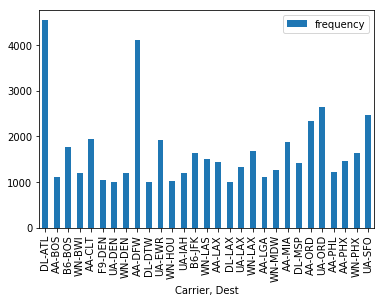

In [20]:

empty_list = []
for i in range(len(join_df)):
    empty_list.append(join_df['Carrier'][i]+'-'+join_df['Dest'][i])

bad_flight = pd.DataFrame(empty_list,join_df['a_count']).reset_index()
bad_flight.columns=['frequency','Carrier, Dest']
print(list(bad_flight))
import matplotlib.pyplot as plt
bad_flight.plot.bar(x='Carrier, Dest',y='frequency')

In [19]:
## 6.3.1